<a href="https://colab.research.google.com/github/GabrielleYa/Project_2_Adult_Income/blob/main/Adult_Income_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Adult Income <center>

- **Author:** Gabrielle Ray

- **Coding Dojo**

# **CRISP-DM Step 1: Business Understanding**

## **Buisness Probelm**

These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.



## **The Data**
- The dataset contains 16 columns

- Target filed: Income

- The income is divide into two classes: <=50K and >50K

- Number of attributes: 14

- 7% have missing values.

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

## **Data Dictionary**

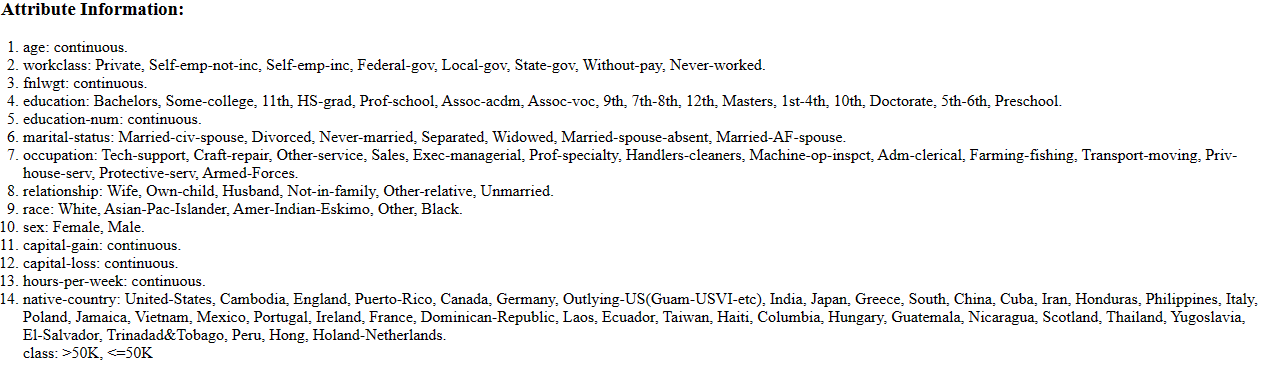

## **Mount Drive**

In [1]:
# Mounting Google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Imports**

In [2]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# Seaborn
import seaborn as sns

# MatplotLib
import matplotlib.pyplot as plt

# Warning
import warnings

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model Selection
from sklearn.model_selection import GridSearchCV

# Set global scikit-learn configuration
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram')

## **Evaluation Functions**

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

In [4]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

# **Notebook Defualts and Runtime Configurations**

## **Warnings**

In [5]:
# Setting filter warings to ignore
warnings.filterwarnings('ignore')

## **Pandas Display Configurations**

In [6]:
# Displaying all columns
pd.set_option('display.max_column', 50)

# Displaying all rows
pd.set_option('display.max_rows', 50)

## **Sklearn Display Configurations**

In [7]:
# Sklearn Display
set_config(display ='diagram')
set_config(transform_output='pandas')

# **CRISP-DM Step 2: Data Understanding**

## **Load and Inspect data**

### **.head()**

In [8]:
# Loading in file with pandas
fpath = "/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/adult.csv (1).zip"
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- The dataset appers to have loaded correctly

In [9]:
# Displaying the bottom 5 rows of the dataset
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### **.shape**

In [10]:
# Displaying the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


### **.info()**

In [11]:
# Displaying the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are no missing values in the data set
- There appear to be 6 numeric columns and 9 categorical columns
- the values of the data set range from 0 - 48,841

### **.nunique()**

In [12]:
# Displaying the value counts for the data set
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

- fnlwgt has an extremly high carninality would not be appropriate to keep for the modeling phase. This column will be dropped.

### **.describe()**

In [13]:
# Displaying the statistical summary
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- There are no outliers present

In [14]:
# Displaying the statistical summary for the categorical columns
df.describe(exclude= "number")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


- There are more men in this column than women

# **CRISP-DM Step 3: Prepare the Data**

## **3.1. Clean the Data**

### **Remove Unnecessary Columns**

- fnlwgt has a high cardinality, that will poorly effect the model during the preprocessing phase, and with my buisness understanding it is not nescessary to keep the feature.

In [15]:
# Removing the unnecessary columns
df.drop(columns=['fnlwgt'], inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

- The fnlwgt feature has been dropped appropriately

### **Remove Unecessary Rows**

#### **Duplicates**

In [16]:
# Displaying the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 6374 duplicate rows.


- These duplicates are irrelevant to keep and will be dropped.

In [17]:
# Dropping all duplicate rows
df = df.drop_duplicates()

In [18]:
# Displaying the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- All dupliacte rows have been dropped appropriately

### **Inspect Values for Errors**

In [19]:
# Looping through categorical value counts to inspect any possible value errors
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print("")

Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64

Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       5679
Exec-managerial      5412
Adm-clerical         4813
Sales                

The is a "?" in the native - country column, this sin't consistant to this column and the "?" will be change to "other".

### **Native Country**

In [20]:
# Replacing the question mark character int the "native-coutry" column with "other"
df['native-country'].replace({'?': "Other"}, inplace=True)

In [21]:
# Looping through categorical value counts to confirm that "?" was replaced with "other"
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print("")

Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64

Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       5679
Exec-managerial      5412
Adm-clerical         4813
Sales                

- change was appropriately made.

# **Exploratory Data Analysis**

## **Multivariate Visualization 1**

In [22]:
# Creating filter for females and saving it as df_female
female_filter = df['gender'] == "Female"
df_female = df.loc[female_filter]
df_female.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
12,26,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K
17,43,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
18,37,Private,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K


In [23]:
# Creating a filter for males and saving it as df_male using ~female_filter
df_male = df.loc[~female_filter]
df_male.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


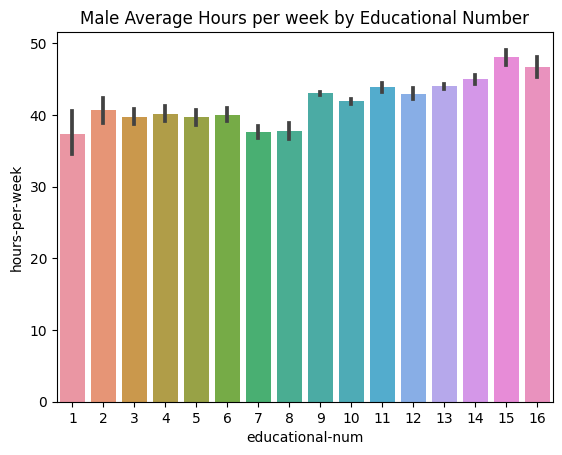

In [24]:
# Combine a barplot and a stripplot
ax = sns.barplot(data=df_male, x='educational-num', y='hours-per-week')
# Setting the title
ax.set_title('Male Average Hours per week by Educational Number');

### **Multivarite Viz Interpretation 1**

- educational number 1 has a mean of about 40 hours per week.
- Males with an educational number of 15 work about 48 hours per
week
- All males work at least 35 hours per week


(Create a bar plot for females comparing the two )

## **Multivariate Visualization 2**

In [25]:
# Checking all numeric features in the data frame for correlations
# using df.corr()
corr = df.corr()

# Viewing correlation values
corr

# Setting correlation values
corr.round(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.00,0.02,0.07,0.05,0.04
educational-num,0.02,1.00,0.13,0.08,0.13
capital-gain,0.07,0.13,1.00,-0.04,0.08
capital-loss,0.05,0.08,-0.04,1.00,0.05
hours-per-week,0.04,0.13,0.08,0.05,1.00


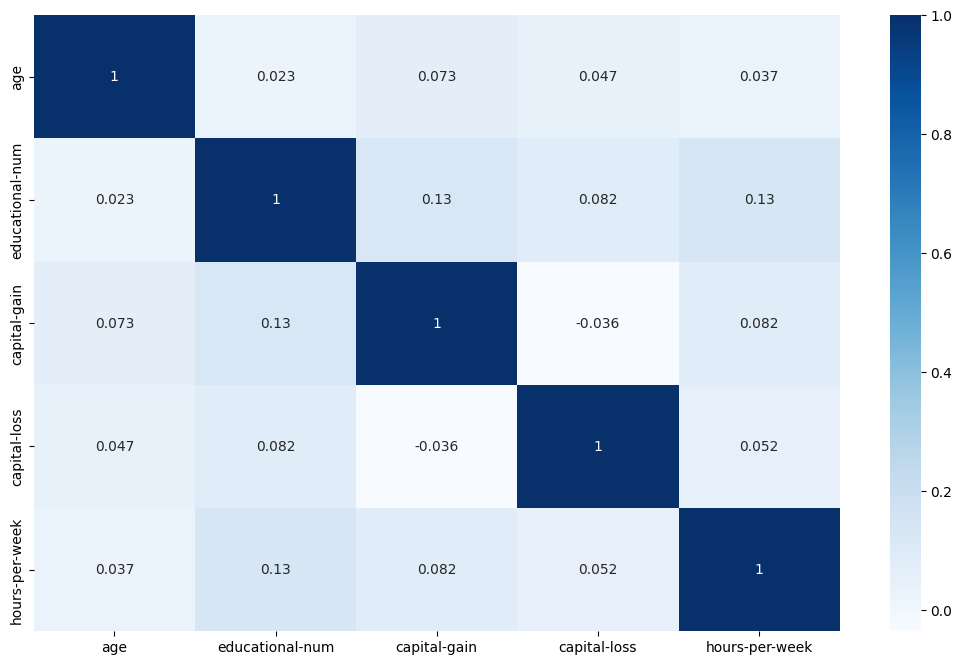

In [26]:
# Defining the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe I made
# np.triu() returns the upper triangle of any array
# by mask/ blocking the upper triangle, it leaves only the lower triangle of the heatmap
# Heat map subplot size had to be adjusted to fit all values using plt.subplots(figsize = )

fig, ax = plt.subplots(figsize = (13, 8))
sns.heatmap(corr, cmap= 'Blues', annot = True);

### **Multivariate Viz Interpretation 2**

- There are no features that present a high correlaton
- Capital loss and capital gain present the only negative corellation
- Capital gain and educational num are the closest feature to 1 with a positive correlation of 0.13%
- educational num and age have the weakest positive corellation of 0.02%.


## **3.2 Model Validation Data Split**

### **Create a Copy of the Dataset**

In [27]:
# Creating a copy of the dataset for Modeling
df_ml = df.copy()

### **Check Class Balance**

In [28]:
# Checking how many samples of each class are present
df_ml['income'].value_counts(normalize=False)

<=50K    32020
>50K     10448
Name: income, dtype: int64

In [29]:
# Checking how many samples of each class are present
df_ml['income'].value_counts(normalize=True)

<=50K    0.753979
>50K     0.246021
Name: income, dtype: float64

## **Split the Data**

In [30]:
# Defining features (X) and target (y)
target = 'income'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

In [31]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [32]:
# Displaying the first 5 rows for the X_train dataset
X_train.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
38445,59,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States
1936,41,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
10048,40,Private,Bachelors,13,Divorced,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines
12636,47,Local-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,7688,0,40,United-States
46488,30,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,30,United-States


In [33]:
# Viewing the informative summary
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31851 entries, 38445 to 4554
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              31851 non-null  int64 
 1   workclass        31851 non-null  object
 2   education        31851 non-null  object
 3   educational-num  31851 non-null  int64 
 4   marital-status   31851 non-null  object
 5   occupation       31851 non-null  object
 6   relationship     31851 non-null  object
 7   race             31851 non-null  object
 8   gender           31851 non-null  object
 9   capital-gain     31851 non-null  int64 
 10  capital-loss     31851 non-null  int64 
 11  hours-per-week   31851 non-null  int64 
 12  native-country   31851 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.4+ MB


### **Class Balance**

In [34]:
# Checking how many samples of each class are present for train
y_train.value_counts(normalize=True)

<=50K    0.753979
>50K     0.246021
Name: income, dtype: float64

# **3.3 Preprocessing for Machine Learning**

#### **Feature Observation**

- The following columns are catergorcal nominal:


## **Numerical Preprocessing Pipeline**

In [35]:
# Saving list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Instantiating preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Making a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


##**Categorical Preprocessing Pipeline**

In [36]:
# Saving list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)

# Instantiating the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Creating a pipeline with imputer and encoder
ohe_pipe = make_pipeline( ohe_encoder)

# Creating a ohe_tuple for the preprocessor
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


## **Preprocessor**

In [37]:
# Transforming the dataset
X_train_processed_ml = ColumnTransformer([num_tuple, ohe_tuple],
                                         verbose_feature_names_out=False)
X_test_processed_ml = ColumnTransformer([num_tuple, ohe_tuple],
                                        verbose_feature_names_out=False)

### **Processed Data Inspection**

### **PCA (Principle Componets Analysis)**

In [40]:
# Instantiating, fitting and transforming the data using PCA
pca = PCA(n_components= 13)
X_train_processed_pca_ml = pca.fit_transform(X_train_processed_ml)

TypeError: ignored

In [42]:
# Inspecting the first 5 rows of the now transform pca dataset
X_train_processed_pca_ml= pca.transform(X_train_processed_ml)
X_test_processed_pca_ml = pca.transform(X_test_processed_ml)

NotFittedError: ignored

# **CRISP-DM Step 5: Model the Data**

### **KNN Model**

In [43]:
# Instantiating default KNN
knn = KNeighborsClassifier()

knn_PCA = KNeighborsClassifier()

### **Model Pipelines**

In [44]:
# Instantiating default KNN
knn = KNeighborsClassifier()

# Defining KNN model pipeline
knn_pipe = make_pipeline(scaler, pca, knn)

# Fitting the model on the training data
knn_pipe.fit(X_train, y_train)

ValueError: ignored

### **Evaluate**

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

### **Tune the Hyperparameters**

In [ ]:
# Instantiate the transformers
pca = PCA()

In [ ]:
# Display the hyperparameters.
knn_2 = KNeighborsClassifier()
knn_2_pipe = make_pipeline(scaler, pca, knn_2)

In [ ]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

In [ ]:
# Viewing params
knn_pipe.get_params()

In [ ]:
knn_params = { 'kneighborsclassifier__p':range(8, 15),
              'kneighborsclassifier__n_neighbors':range(5,10),
               "pca__n_components": [5,6,7,8,9,10]}

In [ ]:
# Instantiating GridSearchCV
knn_gridsearch = GridSearchCV(knn_pipe, knn_params,cv = 5, verbose = True,
                              n_jobs = -1,
                              scoring = 'recall_macro').fit(X_train, y_train)

In [ ]:
# Displaying the best params
knn_gridsearch.best_params_

In [ ]:
# Instantiate the transformers
pca = PCA(n_components=5)
# Fit the transformer on the Train
pca.fit(X_train)

In [ ]:
# Fitting
best_knn_pipeline.fit(X_train, y_train)

In [ ]:
# Obtaining complete evaluation for best performing model
evaluate_classification(best_knn_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
# Displaying the value counts for y_train (the target)
y_train.value_counts(normalize=True)

## **Logistic Regression**

In [ ]:
# Instantiating the model
logreg = LogisticRegression()
logreg_PCA = LogisticRegression(max_iter=3500)

### **Comparing Model Training Time**

In [ ]:
# Measuring the time to train the model without PCA
%timeit logreg.fit(X_train_processed_df, y_train)

In [ ]:
# Measuring the time to train the model with PCA
%timeit logreg_PCA.fit(X_train_processed_pca_df, y_train)

### **Compare Model Accuracy Metric**

In [ ]:
# Checking the accuracy of the model without PCA
print('Testing accuracy:', logreg.score(X_test_processed_df, y_test))

In [ ]:
# Checking the accuracy of the model with PCA
print('Testing accuracy:', logreg_PCA.score(X_test_processed_pca_df, y_test))

#### **Model Pipelines**

In [ ]:
# Creating a default model
log_reg = LogisticRegression(max_iter=3500)

# Creating the pipeline
log_reg_pipe = make_pipeline(scaler, pca, log_reg)
# Fitting the model on to the train and test data
log_reg_pipe.fit(X_train, y_train)

In [ ]:
# Evaluating said model
evaluate_classification(log_reg_pipe, X_train, y_train, X_test, y_test)

#### **Hypertune the Model**

In [ ]:
# Creating a instance of the model with the best parameters
log_reg_2 = LogisticRegression()

# Creating the  model pipeline
log_reg_pipe = make_pipeline(scaler, pca, log_reg_2)

In [ ]:
# Setting params dictionary
params = {
          "pca__n_components": [1,2,3,4,5,6,7,8,9,10],
          "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
          "logisticregression__max_iter": [50, 100, 500, 1000, 2000, 2500]
          }

In [ ]:
# Fitting Gridsearch
logreg_gs = GridSearchCV(
                     log_reg_pipe,
                     param_grid=params,
                     cv=5,
                     verbose= 0,
                     n_jobs=-1
                     ).fit(X_train, y_train)

In [ ]:
# Displaying the best params
logreg_gs.best_params_

In [ ]:
# Instantiating the transformers :)
pca = PCA(n_components=5)

# Fitting the transformer on to X_train data
pca.fit(X_train)

In [ ]:
# Creatinng an instance of the model
best_log_reg = LogisticRegression(max_iter=50, C=.5)

# Creating the model pipeline for best params
best_log_reg_pipe = make_pipeline(scaler, pca, best_log_reg)

In [ ]:
# Fiting the model pipeline on the train and test data
best_log_reg_pipe.fit(X_train, y_train)

In [ ]:
# Evaluating the model
evaluate_classification(best_log_reg_pipe, X_train, y_train, X_test, y_test)